<a href="https://colab.research.google.com/github/noushadkhan01/Projects/blob/master/Hackathons/Analytics%20Vidhya/Loan%20Approval%20Prediction/Predict_Loan_Approval_Analytics_Vidhya_Hackathon.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np

In [3]:
train = pd.read_csv('https://bit.ly/310J7ZX')
train.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [4]:
test = pd.read_csv('https://bit.ly/2LJwq1U')
test.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban
3,LP001035,Male,Yes,2,Graduate,No,2340,2546,100.0,360.0,NaN,Urban
4,LP001051,Male,No,0,Not Graduate,No,3276,0,78.0,360.0,1.0,Urban


In [5]:
train.shape, test.shape

((614, 13), (367, 12))

###ratio of class in training dataset

In [6]:
train.Loan_Status.value_counts()

Y    422
N    192
Name: Loan_Status, dtype: int64

#Data Preprocessing

##check null values

In [7]:
print('train\n', train.isnull().sum().sort_values(ascending = False)[:9])
print('\n\n test\n', test.isnull().sum().sort_values(ascending = False)[:9])

train
 Credit_History      50
Self_Employed       32
LoanAmount          22
Dependents          15
Loan_Amount_Term    14
Gender              13
Married              3
Loan_Status          0
Property_Area        0
dtype: int64


 test
 Credit_History       29
Self_Employed        23
Gender               11
Dependents           10
Loan_Amount_Term      6
LoanAmount            5
Property_Area         0
CoapplicantIncome     0
ApplicantIncome       0
dtype: int64


In [8]:
train_null_columns = train.isnull().any(axis = 0)
train_null_columns = train_null_columns[train_null_columns == True].keys()
train_null_columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

In [9]:
test_null_columns = test.isnull().any(axis = 0)
test_null_columns = test_null_columns[test_null_columns == True].keys()
test_null_columns

Index(['Gender', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

##Drop irrelevant features

In [0]:
train.drop(['Loan_ID'], inplace = True, axis = 1)
test.drop(['Loan_ID'], inplace = True, axis = 1)

In [11]:
#make test and train columns in same order if they are in different order
test = test[train.columns.values[:-1]]
test.shape

(367, 11)

In [12]:
test.head(2)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban


In [13]:
train.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

In [14]:
train_null_columns

Index(['Gender', 'Married', 'Dependents', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History'],
      dtype='object')

#Fill Null Values

##Check which null column directly related to any other column

##Visualisation

In [15]:
cat_columns = train.select_dtypes(include = 'object').columns
cat_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [16]:
cat_columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'Property_Area', 'Loan_Status'],
      dtype='object')

In [0]:
def plot_text(text):
  plt.figure(figsize = (20, 1.5))
  plt.text(.5, 0.5, s = text, size= 40,
           ha="center", va="center",
           bbox=dict(boxstyle="round",
                     facecolor = 'blue',
                     ec=(1., 0.5, 0.5),
                     fc=(1., 0.8, 0.8),
                     ))
  sns.despine(left = True, bottom = True)
  plt.xticks([])
  plt.yticks([])
  plt.show()

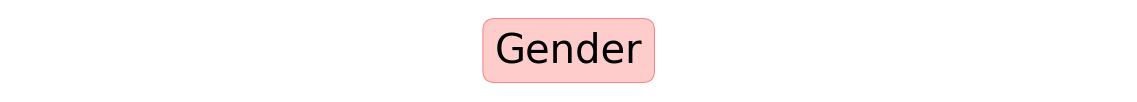

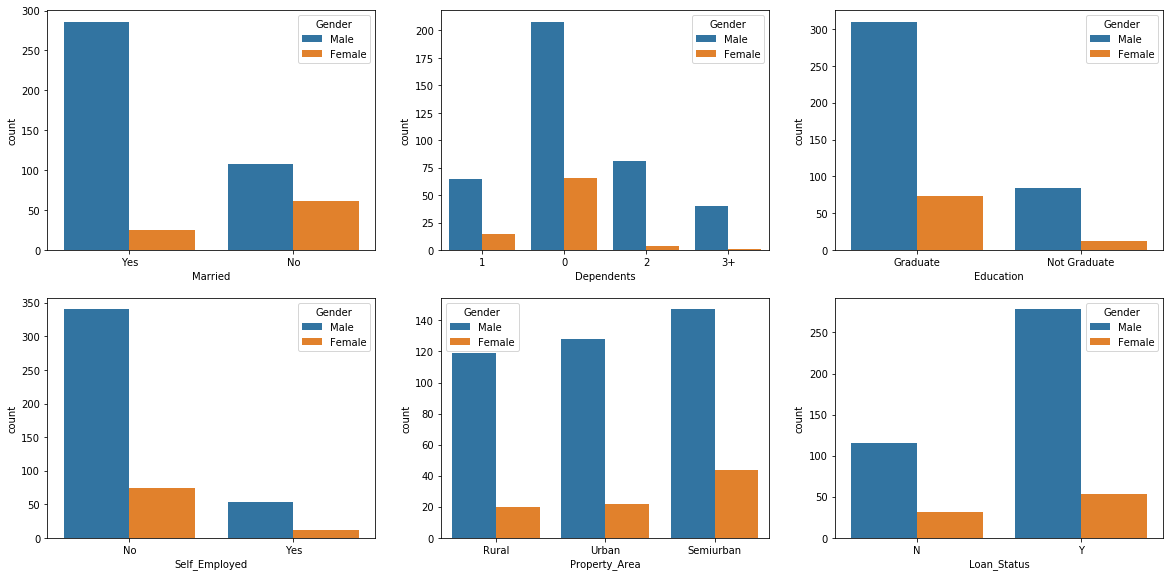

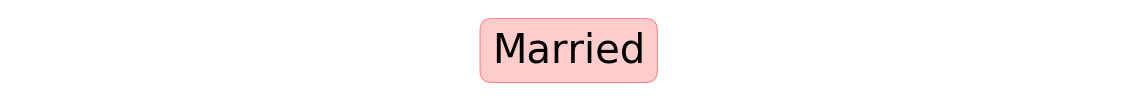

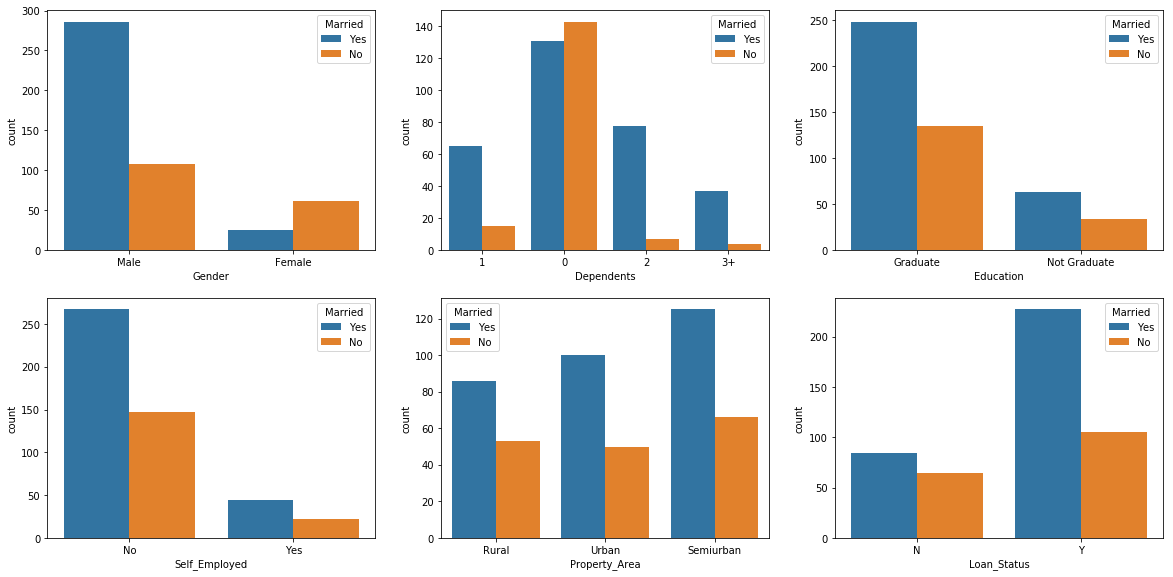

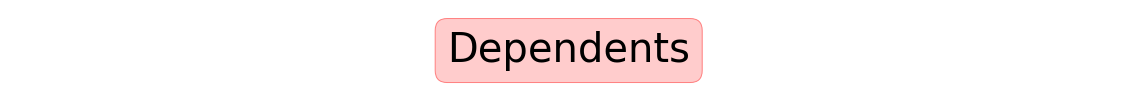

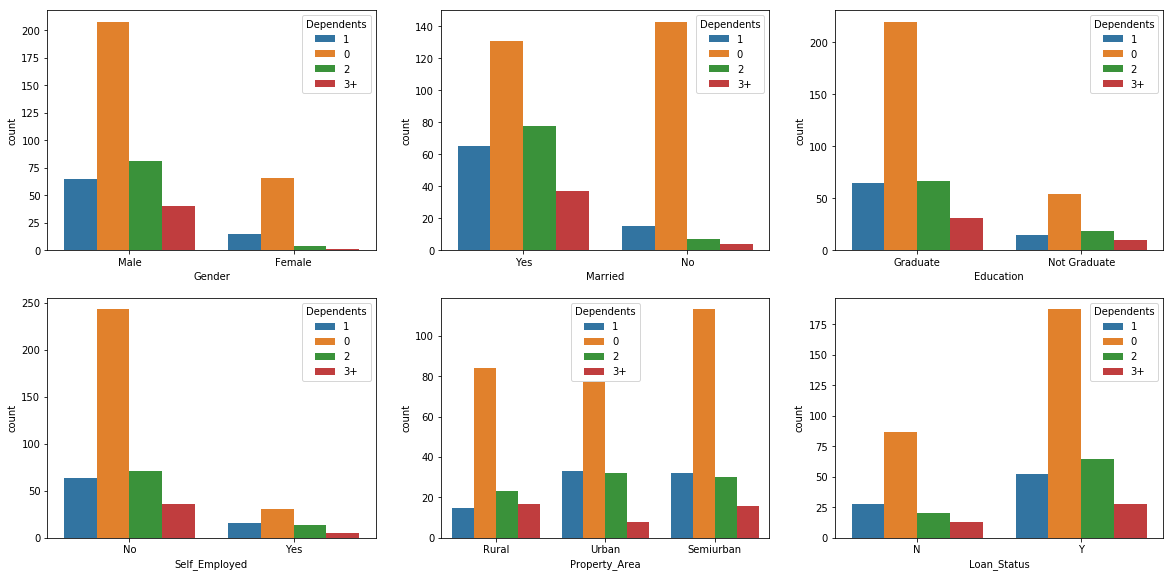

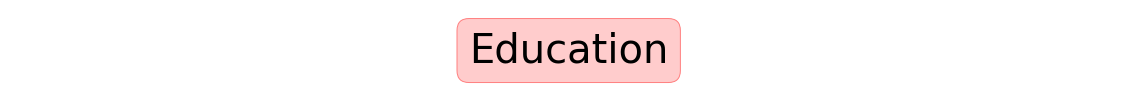

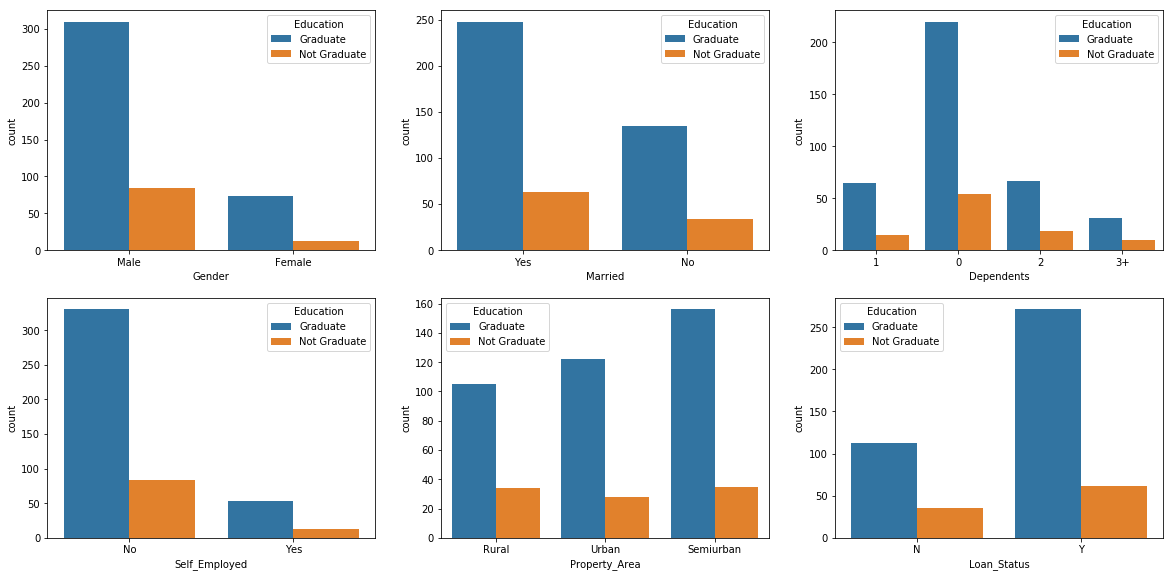

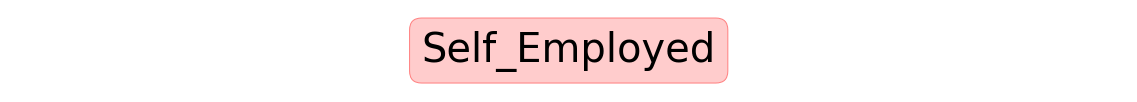

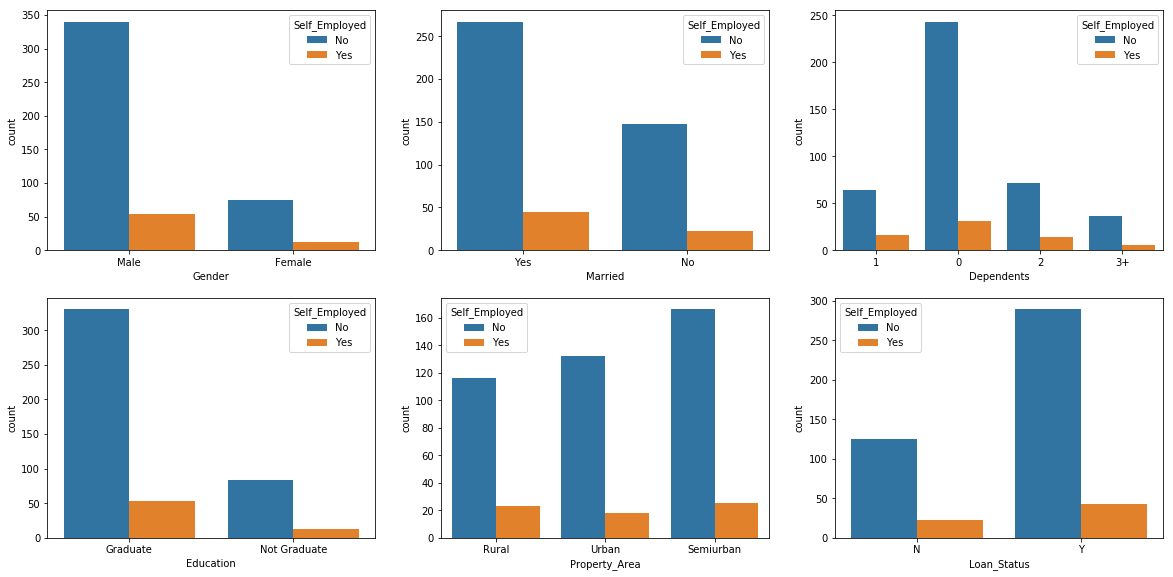

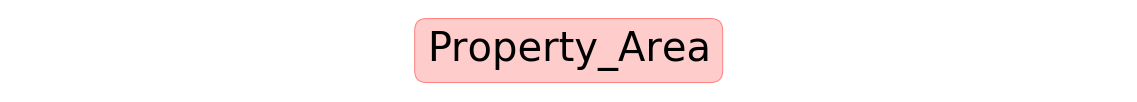

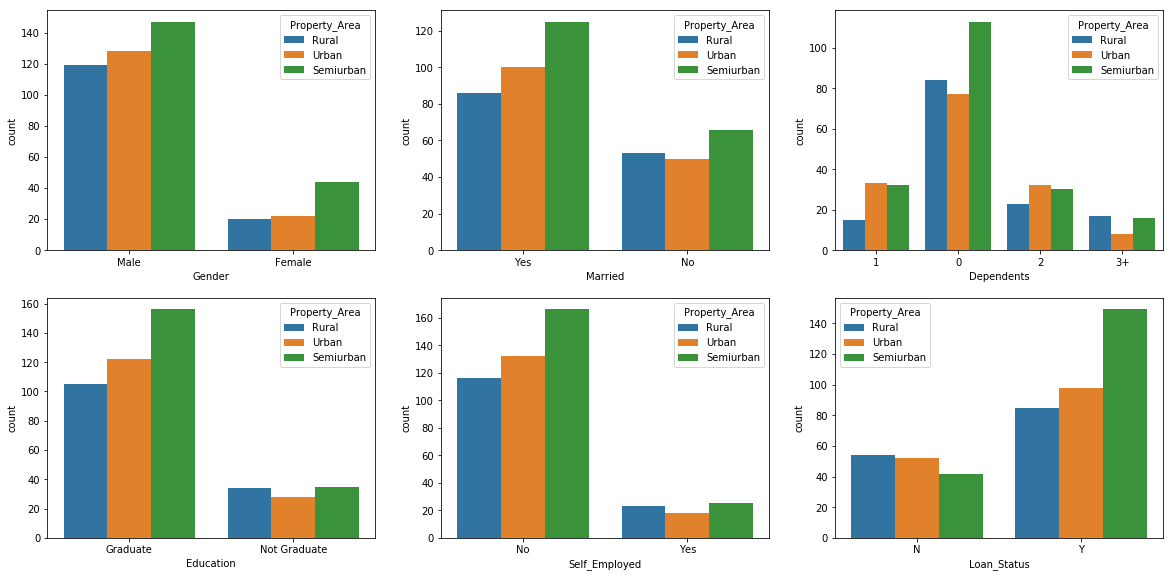

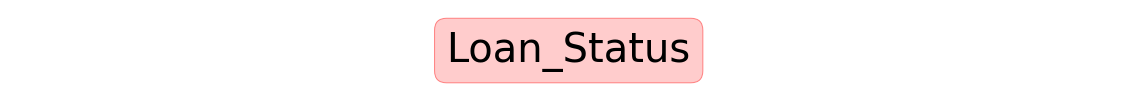

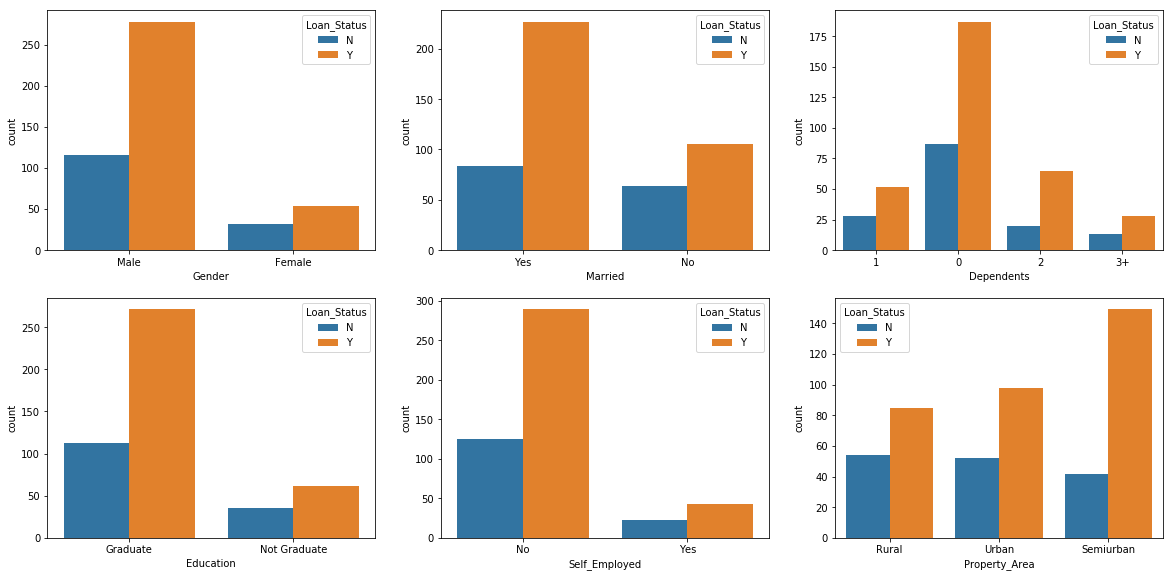

In [43]:
for i in cat_columns:
  plot_text(i)
  n = 1
  l = cat_columns.tolist()
  column = i
  l.remove(column)
  plt.figure(figsize = (20, 15))
  for i in l:
    plt.subplot(3, 3, n)
    sns.countplot(x = i, hue = column, data = train.dropna())
    n += 1
  plt.show()


**I think Credit_History is the most useful feture for our model**

In [0]:
!git clone https://github.com/noushadkhan01/my_methods
%cd my_methods
from print_model_results import print_model_results
from get_cross_validation import get_cross_validation
from my_dummy_variable_creator import MyDummyVariable
import my_global_variables
#initialize my_global_variable
my_global_variables.init()
from choose_best_classifier import choose_best_classifier
%cd ../

fatal: destination path 'my_methods' already exists and is not an empty directory.
/content/my_methods/my_methods
/content/my_methods


In [0]:
ohe = MyDummyVariable(drop_na = True, all_labeled = True)

In [0]:
train_ohe = ohe.fit_transform(train)
train_ohe.shape

(480, 15)

In [0]:
train_ohe.head()

,Gender_Male,Married_Yes,Dependents_1,Dependents_2,Dependents_3+,Education_Not Graduate,Self_Employed_Yes,Property_Area_Semiurban,Property_Area_Urban,Loan_Status_Y,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4583.0,1508.0,128.0,360.0,1.0
1,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,3000.0,0.0,66.0,360.0,1.0
2,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,1.0,2583.0,2358.0,120.0,360.0,1.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,6000.0,0.0,141.0,360.0,1.0
4,1.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,1.0,5417.0,4196.0,267.0,360.0,1.0
